#Vending machine analytics
**The location and machine data is as follows**


>(1) Gutten Plans - Frozen dough specialist company that operates 24/5 . Vending machine assigned is GuttenPlans x1367

>(2) EB Public Library - Public library that has high foot traffic 5-6 days a week. Vending machine : EB Public Library x1380

>(3) Brunswick Sq Mall - Mall with average foot traffic 7 days a week. Vending machine(s) : BSQ Mall x1364 - Zales & BSQ Mall x1366 - ATT

>(4) Earle Asphalt - A construction engineering firm that operates 5 days a week. Vending machine : Earle Asphalt x1371



**This file has the following attributes**

>Status : Represents if the machine data is successfully processed

>Device ID : Unique electronic identifier ( also called as ePort) for the vending machine. A machine is allocated a unique ePrt * device

>Location : Indicates location of the vending machine

>Machine : User-friendly machine name

>Product : Product vended from the machine

>Category : Carbonated / Food / Non-carbonated / Water

>Transaction : Unique identifier for every transaction

>TransDate : The Date & time of transaction

>Type : Type of transaction ( Cash / Credit )

>RCoil : Coil # used to vend the product

>RPrice : Price of the Product

>RQty : Quantity sold. This is usually one but machines can be configured to sell more items in a single transaction

>MCoil : Mapped coil # used to vend the product ( from toucan )

>MPrice : Mapped price of the Product

>MQty : Mapped quantity sold. This is usually one but machines can be configured to sell more items in a single transaction

>LineTotal : Total sale per transaction

>TransTotal : Represents total of all transactions that will show up on the Credit Card. A user could vend a drink for 3 and a snack for 1.5 making a total of 4.50

>Prcd Date : Date when the transaction was processed by SeedLive ( an entity that is used to aggregate all transactions electronically )

# 1. Import Library & Import Data

*   List item
*   List item



In [42]:
import sys
import pandas as pd
import numpy as np
import re # ในตอนแรกจะใช้ในการ replace ค่าวันที่ เป็นชื่อวัน แต่พบว่ามีวิธีที่ง่ายกว่าจึงไม่ได้ใช้แล้ว
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
df = pd.read_csv('vending_machine_sales.csv') 
df.info()
 # ตรวจสอบข้อมูลที่ได้มาว่า column ไหนสามารถใช้ได้บ้าง แล้วเป็น type อะไรบ้าง
 # import file ซึ่งนำมาจาก kaggle ในการหาข้อมูลมีขั้นตอนที่ยากคือ 
 # ข้อมูลที่สวยงามใช้ได้จริงและสามารถหา insight เพิ่มเติมค่อนข้างหายาก อีกทั้งใน kaggle ยังมีคนที่ทำข้อมูลไว้เยอะแล้ว 
 # จึงค่อนข้างยากที่จะได้ข้อมูลใหม่ที่คนยังไม่ค่อยทำ และสามารถหา insight ต่าง ๆ ได้

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6445 non-null   object 
 1   Device ID    6445 non-null   object 
 2   Location     6445 non-null   object 
 3   Machine      6445 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6260 non-null   object 
 6   Transaction  6445 non-null   int64  
 7   TransDate    6445 non-null   object 
 8   Type         6445 non-null   object 
 9   RCoil        6445 non-null   int64  
 10  RPrice       6445 non-null   float64
 11  RQty         6445 non-null   int64  
 12  MCoil        6445 non-null   int64  
 13  MPrice       6444 non-null   float64
 14  MQty         6445 non-null   int64  
 15  LineTotal    6445 non-null   float64
 16  TransTotal   6445 non-null   float64
 17  Prcd Date    6445 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

In [44]:
display(df)
 # ตรวจสอบข้อมูลที่ได้มาว่า column ไหนสามารถใช้ได้บ้าง แล้วเป็น type อะไรบ้าง มี column ใดบ้างที่เป็น N/A

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,"Wednesday, August 31, 2022",Credit,122,2.0,1,122,2.0,1,2.0,6.0,8/31/2022
6441,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,"Wednesday, August 31, 2022",Credit,131,2.0,1,131,2.0,1,2.0,6.0,8/31/2022
6442,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,"Wednesday, August 31, 2022",Credit,137,2.0,1,137,2.0,1,2.0,6.0,8/31/2022
6443,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,"Wednesday, August 31, 2022",Credit,145,2.5,1,145,2.5,1,2.5,2.5,8/31/2022


In [45]:
df = df.loc[ : ,['Location','Machine','Product','Category','TransDate','Type','MPrice','MQty','LineTotal'] ]
 # เลือกเฉพาะ column ที่ต้องการ

# 2. Cleansing Data

In [46]:
df[df[ 'Product'].isna()][['Product'] ]
#จากขั้นตอนการเช็คข้อมูล เราจะพบว่า column Product มี N/A จึงได้ทำการเลือกมาดู

,Product
1232,NaN
1431,NaN
1439,NaN
5500,NaN


In [47]:
df = df.dropna(subset=['Product'])
print(df.shape)
#ตัด N/A ใน column Product ออกไป เนื่องจากไม่สามารถใช้ได้

(6441, 9)


In [48]:
df2 = df[df[ 'Category'].isna()]
pd.unique(df2['Product'])

#สร้าง df2 ขึ้นมาใหม่ เพื่อคัดเฉพาะ category ที่เป็น N/A
#เราจะทำการเพิ่ม category ใน N/A เราจึง list ข้อมูล product ออกมาดู เพื่ออ้างอิงว่าเป็น category อะไร
#ในตอนแรกตั้งใจจะใช้ fillna แต่เนื่องจากข้อมูลใน แต่ละ row ต้องอ้างอิง column อื่น และต้องมีเงื่อนไขด้วย จึงเปลี่ยนมาสร้าง def เพื่อเขียนเงื่อนไขแทน

array(['Doritos Dinamita Chile Lemon', 'Doritos Spicy Nacho',
       'Mini Chips Ahoy - Go Paks', 'Oreo Mini - Go Paks',
       'Teddy Grahams - Go Paks', 'Starbucks Doubleshot Energy - Coffee',
       'Canada Dry - Ginger Ale & Lemonde', 'Canada Dry - Ginger Ale'],
      dtype=object)

In [49]:
#สร้าง def ขึ้นมาเพื่อใส่ค่า category โดยกำหนดเงื่อนไขดังด้านล่างนี้ใน df2
def assign_Result(product):
    if product == 'Canada Dry - Ginger Ale & Lemonde' or product == 'Canada Dry - Ginger Ale':
        result = 'Carbonated'
    elif product == 'Starbucks Doubleshot Energy - Coffee':
        result = 'Non Carbonated'
    else:
        result = 'Food'

    return result
df2['Category'] = df2['Product'].apply(assign_Result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [50]:
#ทำการ drop row ที่ category เป็น N/A ทิ้ง บน df เพื่อเตรียม concatenate กับ df2 ที่สร้างใหม่
df = df.dropna(subset=['Category'])
df

,Location,Machine,Product,Category,TransDate,Type,MPrice,MQty,LineTotal
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,"Saturday, January 1, 2022",Credit,3.5,1,3.5
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,"Saturday, January 1, 2022",Credit,3.5,1,3.5
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,"Saturday, January 1, 2022",Credit,1.5,1,1.5
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,"Saturday, January 1, 2022",Credit,1.5,1,1.5
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,"Saturday, January 1, 2022",Credit,3.5,1,3.5
...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,"Wednesday, August 31, 2022",Credit,2.0,1,2.0
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,"Wednesday, August 31, 2022",Credit,2.0,1,2.0
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,"Wednesday, August 31, 2022",Credit,2.0,1,2.0
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,"Wednesday, August 31, 2022",Credit,2.5,1,2.5


In [51]:
df2

,Location,Machine,Product,Category,TransDate,Type,MPrice,MQty,LineTotal
1448,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,Food,"Friday, March 25, 2022",Cash,1.0,1,1.0
1453,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,Food,"Saturday, March 26, 2022",Cash,1.5,1,1.5
1454,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,Food,"Saturday, March 26, 2022",Cash,1.0,1,1.0
1501,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,Food,"Monday, March 28, 2022",Cash,1.0,1,1.0
1507,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,Food,"Tuesday, March 29, 2022",Cash,1.5,1,1.5
...,...,...,...,...,...,...,...,...,...
6320,EB Public Library,EB Public Library x1380,Mini Chips Ahoy - Go Paks,Food,"Saturday, August 27, 2022",Cash,4.0,1,4.0
6344,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Canada Dry - Ginger Ale & Lemonde,Carbonated,"Sunday, August 28, 2022",Credit,1.5,1,1.5
6357,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,"Monday, August 29, 2022",Cash,4.0,1,4.0
6429,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,"Tuesday, August 30, 2022",Cash,4.0,1,4.0


In [52]:
# Concatenate ระหว่าง df และ df2 จะได้เป็น df_vending
df_vending = pd.concat( [df, df2], ignore_index=True  )
df_vending

,Location,Machine,Product,Category,TransDate,Type,MPrice,MQty,LineTotal
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,"Saturday, January 1, 2022",Credit,3.5,1,3.5
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,"Saturday, January 1, 2022",Credit,3.5,1,3.5
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,"Saturday, January 1, 2022",Credit,1.5,1,1.5
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,"Saturday, January 1, 2022",Credit,1.5,1,1.5
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,"Saturday, January 1, 2022",Credit,3.5,1,3.5
...,...,...,...,...,...,...,...,...,...
6436,EB Public Library,EB Public Library x1380,Mini Chips Ahoy - Go Paks,Food,"Saturday, August 27, 2022",Cash,4.0,1,4.0
6437,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Canada Dry - Ginger Ale & Lemonde,Carbonated,"Sunday, August 28, 2022",Credit,1.5,1,1.5
6438,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,"Monday, August 29, 2022",Cash,4.0,1,4.0
6439,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,"Tuesday, August 30, 2022",Cash,4.0,1,4.0


In [53]:
#check ข้อมูล Missing ของ df_vending
missing = df_vending.isna().sum()
display(missing)

Location     0
Machine      0
Product      0
Category     0
TransDate    0
Type         0
MPrice       0
MQty         0
LineTotal    0
dtype: int64

In [54]:
# เนื่องจาก TransDate เป็น object จึงทำการเปลี่ยน Dtype ให้เป็น datetime เพื่องานต่อการจัดการข้อมูล

df_vending['TransDate'] = pd.to_datetime( df_vending['TransDate'] )
df_vending.info()
df_vending

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Location   6441 non-null   object        
 1   Machine    6441 non-null   object        
 2   Product    6441 non-null   object        
 3   Category   6441 non-null   object        
 4   TransDate  6441 non-null   datetime64[ns]
 5   Type       6441 non-null   object        
 6   MPrice     6441 non-null   float64       
 7   MQty       6441 non-null   int64         
 8   LineTotal  6441 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 453.0+ KB


,Location,Machine,Product,Category,TransDate,Type,MPrice,MQty,LineTotal
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,2022-01-01,Credit,3.5,1,3.5
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,2022-01-01,Credit,3.5,1,3.5
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,2022-01-01,Credit,1.5,1,1.5
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,2022-01-01,Credit,1.5,1,1.5
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,2022-01-01,Credit,3.5,1,3.5
...,...,...,...,...,...,...,...,...,...
6436,EB Public Library,EB Public Library x1380,Mini Chips Ahoy - Go Paks,Food,2022-08-27,Cash,4.0,1,4.0
6437,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Canada Dry - Ginger Ale & Lemonde,Carbonated,2022-08-28,Credit,1.5,1,1.5
6438,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,2022-08-29,Cash,4.0,1,4.0
6439,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,2022-08-30,Cash,4.0,1,4.0


In [55]:
# ทำการเพิ่ม column Day เพื่อระบุชื่อวันในแต่ละ row
# ในตอนแรกจะใช้ regex เพื่อ replace ค่าวัน แต่เนื่องจากเรายังต้องการใช้ข้อมูลที่เป็นวันที่ในการวิเคราะห์ จึงใช้วิธีการนี้แทน 
# และเขียนโค้ดสั้นกว่าด้วย เพราะหาก replace จะต้องทำ 7 รอบ แทนชื่อวันทุกวัน
df_vending['Day'] = df_vending['TransDate'].dt.day_name()
df_vending

,Location,Machine,Product,Category,TransDate,Type,MPrice,MQty,LineTotal,Day
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,2022-01-01,Credit,3.5,1,3.5,Saturday
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,2022-01-01,Credit,3.5,1,3.5,Saturday
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,2022-01-01,Credit,1.5,1,1.5,Saturday
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,2022-01-01,Credit,1.5,1,1.5,Saturday
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,2022-01-01,Credit,3.5,1,3.5,Saturday
...,...,...,...,...,...,...,...,...,...,...
6436,EB Public Library,EB Public Library x1380,Mini Chips Ahoy - Go Paks,Food,2022-08-27,Cash,4.0,1,4.0,Saturday
6437,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Canada Dry - Ginger Ale & Lemonde,Carbonated,2022-08-28,Credit,1.5,1,1.5,Sunday
6438,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,2022-08-29,Cash,4.0,1,4.0,Monday
6439,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,Food,2022-08-30,Cash,4.0,1,4.0,Tuesday


# 3. Descriptive Statistics


In [56]:
# ดูข้อมูลทางสถิติพื้นฐาน เช่น mean max min ของภาพรวม
df_vending[ ['MQty',	'LineTotal'] ].agg( {'MQty' : ['mean','min','max'], 'LineTotal':['mean','min', 'max'] } )

,MQty,LineTotal
mean,1.013352,1.949697
min,1.000000,1.000000
max,3.000000,8.000000


In [57]:
# ดูข้อมูลแยกตาม Location โดยเรียงข้อมูล LineTotal จากมากไปน้อย
df_vending.groupby(['Location'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False)

,MQty,LineTotal
Location,,
GuttenPlans,2594,4882.75
EB Public Library,1933,3944.25
Brunswick Sq Mall,1320,2537.50
Earle Asphalt,680,1193.50


In [58]:
# ดูข้อมูลแยกตามชื่อวัน โดยเรียงข้อมูล LineTotal จากมากไปน้อย
df_vending.groupby(['Day'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False)

,MQty,LineTotal
Day,,
Wednesday,1129,2189.25
Thursday,1113,2147.75
Tuesday,1134,2123.00
Monday,1042,1984.50
Friday,1026,1950.25
Saturday,690,1386.75
Sunday,393,776.50


In [59]:
# ดูข้อมูลแยกตามหมวดหมู่ของสินค้าในตู้กด โดยเรียงข้อมูล LineTotal จากมากไปน้อย
df_vending.groupby(['Category'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False)

,MQty,LineTotal
Category,,
Food,3602,6276.75
Carbonated,1699,3486.25
Non Carbonated,731,1882.00
Water,495,913.00


In [60]:
# ดูภาพรวมข้อมูลแยกตามสินค้าในตู้กด 5 อันดับแรกที่มีการซื้อไปมากสุด โดยเรียงข้อมูล LineTotal จากมากไปน้อย
df_vending.groupby(['Product'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False).head(5)

,MQty,LineTotal
Product,,
Monster Energy Original,385,1159.0
Coca Cola - Zero Sugar,524,723.0
KitKat - Crisp Wafers,267,575.0
Red Bull - Original,158,528.5
Poland Springs Water,311,477.0


In [61]:
# ดูภาพรวมข้อมูลแยกตามประเภทการจ่ายเงิน โดยเรียงข้อมูล LineTotal จากมากไปน้อย
df_vending.groupby(['Type'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False)

,MQty,LineTotal
Type,,
Cash,4295,7981.5
Credit,2232,4576.5


## 4. Visualization

In [62]:
# ทำการสร้างกราฟเพื่อ visualize ข้อมูลของเรา
plt.style.use('seaborn')

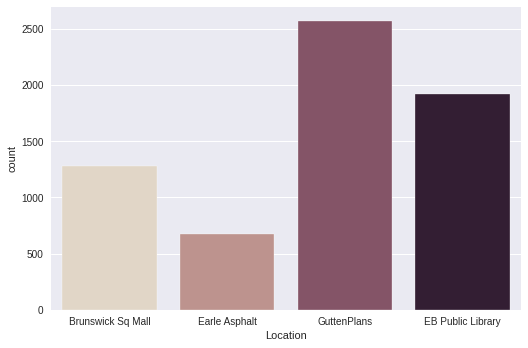

In [63]:
# สร้าง Histogram เพื่อแสดงจำนวนการซื้อของใน vending machine ในแต่ละสถานที่
# ในตอนแรกที่สร้างกราฟ ชื่อของ Location เกยกัน จึงได้ทำการ resize กราฟ ให้สวยงาม
sns.catplot(data=df_vending, kind='count',
            x='Location',     
            height=5, aspect=1.5, palette="ch:.25" )

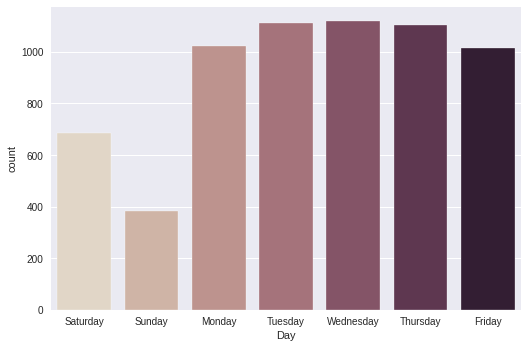

In [64]:
# สร้าง Histogram เพื่อแสดงจำนวนการซื้อของใน vending machine ในแต่ละวัน
sns.catplot(data=df_vending, kind='count',
            x='Day',      
            height=5, aspect=1.5, palette="ch:.25" )

In [65]:
# สร้าง dataframe อันใหม่ โดย pivot ข้อมูลระหว่าง Day และ Location แลให้ข้อมูลในตารางเป็น LineTotal($)
piv = df_vending.pivot_table(index="Location", columns="Day", values="LineTotal",aggfunc='sum')

piv2 = piv.transpose().reset_index().rename(columns = {"index":"Day", 0:"Brunswick Sq Mall", 1:"EB Public Library", 2:"Earle Asphalt", 3:"GuttenPlans"})
display(piv2)

Location,Day,Brunswick Sq Mall,EB Public Library,Earle Asphalt,GuttenPlans
0,Friday,335.00,430.75,245.00,939.50
1,Monday,344.75,684.25,249.00,706.50
2,Saturday,562.00,433.75,4.75,386.25
3,Sunday,454.75,307.00,2.75,12.00
4,Thursday,233.25,680.00,229.75,1004.75
5,Tuesday,332.25,689.50,212.50,888.75
6,Wednesday,275.50,719.00,249.75,945.00


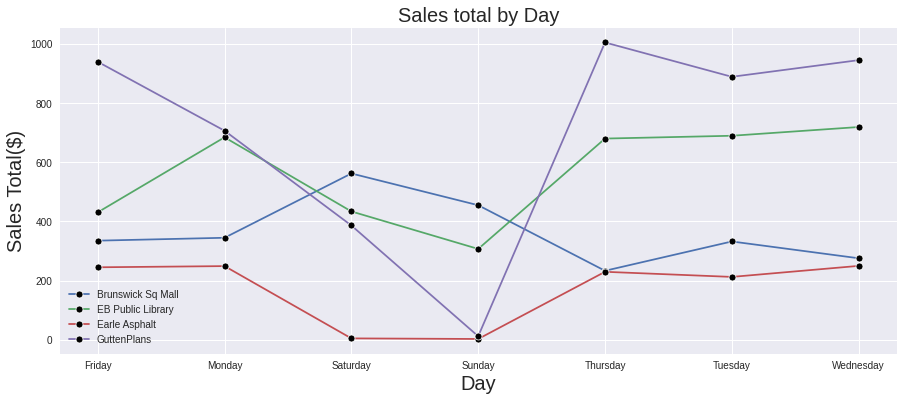

In [66]:
# สร้างกราฟเส้นเพื่อดู cross ระหว่าง วันต่าง ๆ และรายได้ โดยเส้นจะแบ่งตาม Location ของ vending machine
# พบว่าที่ GuttenPlans มีรายได้สูงสุดระหว่างวันจันทร์-วันศุกร์
# Earle Asphalt มีรายได้ต่ำสุดเมื่อเทียบกับที่อื่น ๆ
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data = piv2, x = "Day", y = "Brunswick Sq Mall", marker = "o", label = 'Brunswick Sq Mall', markerfacecolor = 'black')
sns.lineplot(data = piv2, x = "Day", y = "EB Public Library", marker = "o", label = 'EB Public Library', markerfacecolor = 'black')
sns.lineplot(data = piv2, x = "Day", y = "Earle Asphalt", marker = "o", label = 'Earle Asphalt', markerfacecolor = 'black')
sns.lineplot(data = piv2, x = "Day", y = "GuttenPlans", marker = "o", label = 'GuttenPlans', markerfacecolor = 'black')

plt.title('Sales total by Day', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('Sales Total($)', fontsize=20)
plt.legend()

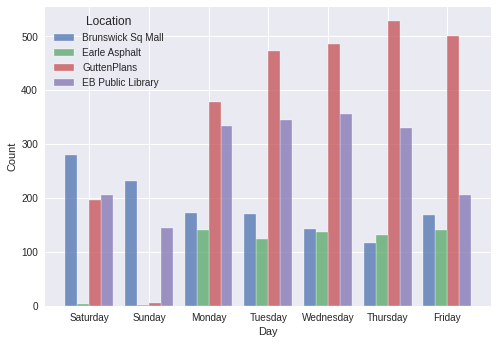

In [67]:
# เนื่องจากเป็นข้อมูลไม่ต่อเนื่อง ซึ่งไม่เหมาะสมกับกราฟเส้น จึงเปลี่ยนมาเป็น Histogram แทน
sns.histplot(data=df_vending, x="Day", hue="Location", multiple="dodge", shrink=.8)

Day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Location,,,,,,,
Brunswick Sq Mall,454.75,344.75,332.25,275.50,233.25,335.00,562.00
EB Public Library,307.00,684.25,689.50,719.00,680.00,430.75,433.75
Earle Asphalt,2.75,249.00,212.50,249.75,229.75,245.00,4.75
GuttenPlans,12.00,706.50,888.75,945.00,1004.75,939.50,386.25


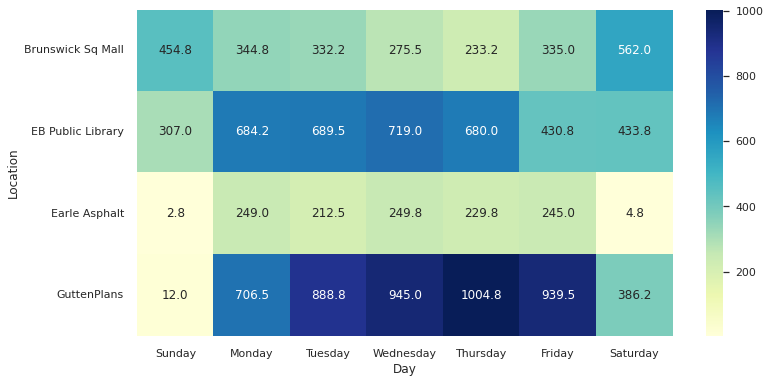

In [68]:
# เพื่อให้ชัดเจนขึ้น จึงนำมาทำ heatmap เพื่อดูข้อมูลที่ cross ระหว่าง Day และ Location
# สร้าง dataframe อันใหม่ โดย pivot ข้อมูลระหว่าง Day และ Location แลให้ข้อมูลในตารางเป็น LineTotal($)
# ในขั้นตอนนี้ ตอนแรกชื่อวันจะเรียงตามตัวอักษร ทำให้ดูยาก จึงมีการ sort Day ใหม่ให้เรียงเป็นวันอาทิตย์-วันเสาร์

df_vending['Day'] = pd.Categorical(df_vending['Day'], ["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"])
piv = df_vending.pivot_table(index="Location", columns="Day", values="LineTotal",aggfunc='sum')
display(piv)


sns.set(rc={'figure.figsize':(12,6)})
ax = sns.heatmap(piv,annot=True,fmt='.1f', cmap="YlGnBu")

Category,Carbonated,Food,Non Carbonated,Water
Location,,,,
Brunswick Sq Mall,628.25,891.00,465.0,553.25
EB Public Library,530.00,2299.50,788.0,326.75
Earle Asphalt,85.50,1011.00,64.0,33.00
GuttenPlans,2242.50,2075.25,565.0,NaN


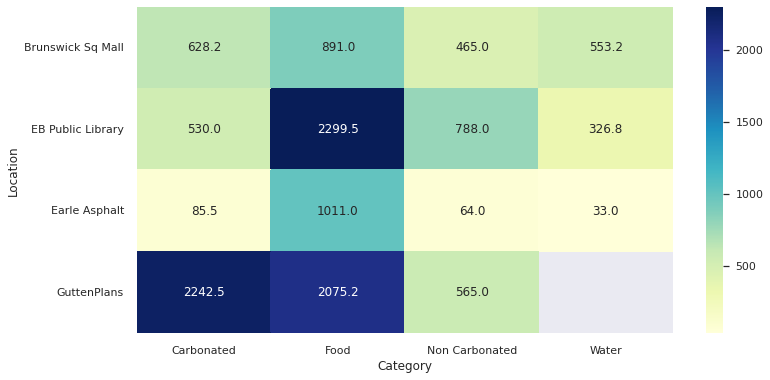

In [69]:
# ต้องการดูว่า ในแต่ละสถานที่ตั้งตู้กด กับหมวดหมู่สินค้า ลูกค้าเลือกซื้อสินค้าแตกต่างกันหรือไม่ จึงสร้างกราฟ Location กับ category เพื่อดูความสัมพันธ์โดยดูจากรายได้
piv4 = df_vending.pivot_table(index="Location", columns="Category", values="LineTotal",aggfunc='sum')
display(piv4)


sns.set(rc={'figure.figsize':(12,6)})
ax = sns.heatmap(piv4,annot=True,fmt='.1f', cmap="YlGnBu")

In [70]:
#สร้าง dataframe ที่ groupby Location และ Product โดนแสดงเฉพาะ LineTotal ที่มากสุด 3 อันดับแรก
Gu1 = df_vending[df_vending["Location"] == 'GuttenPlans']
Gu = Gu1.groupby(['Location','Product'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False).head(3)

Br1 = df_vending[df_vending["Location"] == 'Brunswick Sq Mall']
Br = Br1.groupby(['Location','Product'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False).head(3)

EB1 = df_vending[df_vending["Location"] == 'EB Public Library']
EB = EB1.groupby(['Location','Product'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False).head(3)

Ea1 = df_vending[df_vending["Location"] == 'Earle Asphalt']
Ea = Ea1.groupby(['Location','Product'])[['MQty','LineTotal']].sum().sort_values(by=['LineTotal'],ascending=False).head(3)

df_product = pd.concat( [Gu, Br,EB,Ea]  )
df_product



MQty  \
Location          Product                                               
GuttenPlans       Monster Energy Original                         307   
                  Red Bull - Original                             144   
                  KitKat - Crisp Wafers                           183   
Brunswick Sq Mall Poland Springs Water                            184   
                  Monster Energy Original                          78   
                  Snapple Diet Tea - Peach Tea                     40   
EB Public Library Coca Cola - Zero Sugar                          170   
                  Starbucks Doubleshot Energy - Mocha              74   
                  Poland Springs Water                            127   
Earle Asphalt     Robert Irvine's - Fit Crunch -  Chocolate Pea    79   
                  Wonderful Pistachios - Variety                   76   
                  SunChips Multigrain - Harvest Cheddar            35   

                                                                 LineTotal  
Location          Product                                                   
GuttenPlans       Monster Energy Original                            925.0  
                  Red Bull - Original                                479.5  
                  KitKat - Crisp Wafers                              415.0  
Brunswick Sq Mall Poland Springs Water                               286.5  
                  Monster Energy Original                            234.0  
                  Snapple Diet Tea - Peach Tea                       100.0  
EB Public Library Coca Cola - Zero Sugar                             268.0  
                  Starbucks Doubleshot Energy - Mocha                256.5  
                  Poland Springs Water                               190.5  
Earle Asphalt     Robert Irvine's - Fit Crunch -  Chocolate Pea      158.0  
                  Wonderful Pistachios - Variety                     152.0  
                  SunChips Multigrain - Harvest Cheddar               52.5

Location,Brunswick Sq Mall,EB Public Library,Earle Asphalt,GuttenPlans
Product,,,,
Coca Cola - Zero Sugar,NaN,170.0,NaN,NaN
KitKat - Crisp Wafers,NaN,NaN,NaN,183.0
Monster Energy Original,78.0,NaN,NaN,307.0
Poland Springs Water,184.0,127.0,NaN,NaN
Red Bull - Original,NaN,NaN,NaN,144.0
Robert Irvine's - Fit Crunch - Chocolate Pea,NaN,NaN,79.0,NaN
Snapple Diet Tea - Peach Tea,40.0,NaN,NaN,NaN
Starbucks Doubleshot Energy - Mocha,NaN,74.0,NaN,NaN
SunChips Multigrain - Harvest Cheddar,NaN,NaN,35.0,NaN


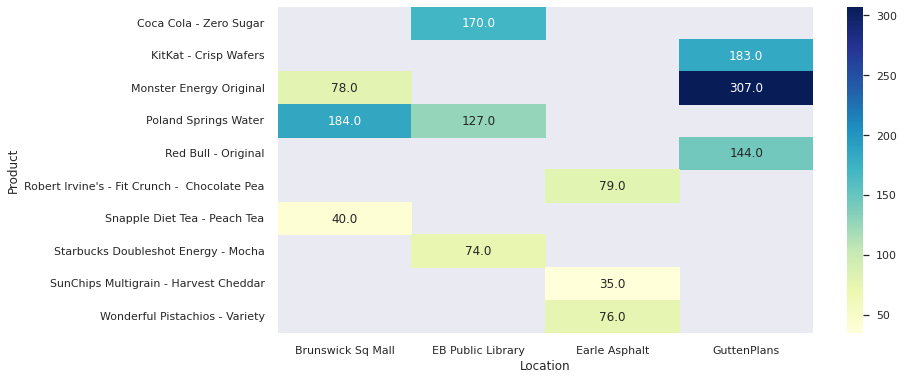

In [71]:
#สร้าง dataframe โดย pivot Location และ Product เพื่อใช้ในการสร้าง heatmap
piv5 = df_product.pivot_table(index="Product", columns="Location", values="MQty",aggfunc='sum')
display(piv5)


sns.set(rc={'figure.figsize':(12,6)})
ax = sns.heatmap(piv5,annot=True,fmt='.1f', cmap="YlGnBu")
# จากข้อมูลจะเห็นว่า ที่ GuttenPlans มีการซื้อ สินค้าประเภทเอเนอจี้ดริ้งเยอะกว่าที่อื่นอย่างเห็นได้ชัด
# ที่ Earle Asphalt 3 อันดับแรกจะเป็น Food ทั้งหมด
# EB Public Library ซื้อ Coca Cola - Zero Sugar มากที่สุด รองลงมาเป็น Poland Springs Water และไม่มีอาหารอยู่ใน 3 อันดับแรก
# Brunswick Sq Mall ซื้อ Poland Springs Water มากที่สุด และไม่มีอาหารอยู่ใน 3 อันดับแรก

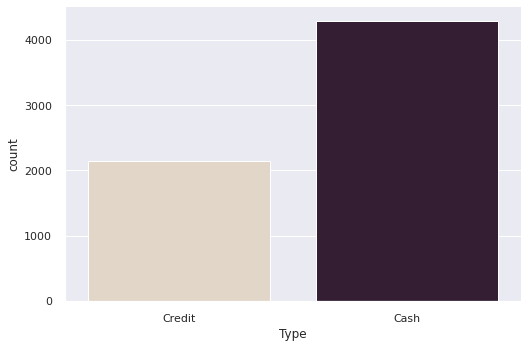

In [72]:
#สร้าง กราฟ จำนวนการซื้อสินค้า โดยแยกตามประเภทการชำระเงินภาพรวม
sns.catplot(data=df_vending, kind='count',
            x='Type',     
            height=5, aspect=1.5, palette="ch:.25" )

In [73]:
#สร้าง data frame เพื่อนำไปใช้ในการสร้างกราฟเส้นต่อไป
piv3 = df_vending.pivot_table(index="Location", columns="Type", values="LineTotal",aggfunc='sum')
display(piv3)


Type,Cash,Credit
Location,,
Brunswick Sq Mall,1389.25,1148.25
EB Public Library,2125.75,1818.50
Earle Asphalt,885.00,308.50
GuttenPlans,3581.50,1301.25


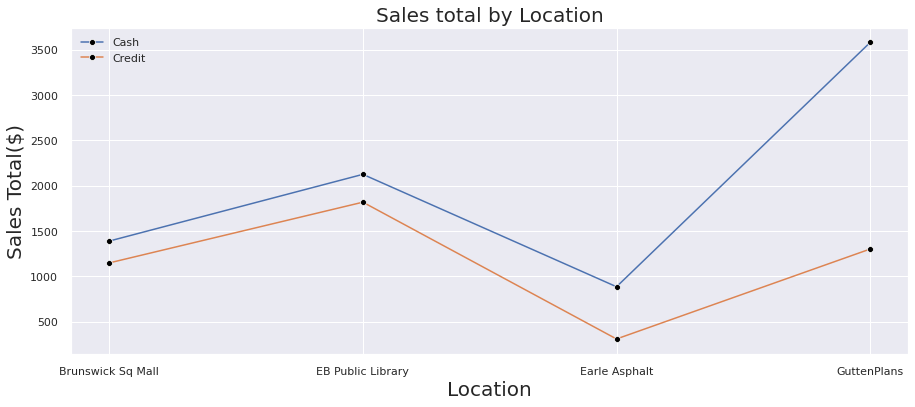

In [74]:
# สร้างกราฟเส้นเพื่อดู plot ระหว่างรายได้และสถานที่ เมื่อแยกตามประเภทการจ่ายเงิน
# พบว่าที่ GuttenPlans มีการชำระโดยวิธี Cash เยออะกว่า Credit อย่างเห็นได้ชัด

fig, ax = plt.subplots(figsize=(15, 6))



sns.lineplot(data = piv3, x = "Location", y = "Cash", marker = "o", label = 'Cash', markerfacecolor = 'black')
sns.lineplot(data = piv3, x = "Location", y = "Credit", marker = "o", label = 'Credit', markerfacecolor = 'black')


plt.title('Sales total by Location', fontsize = 20)
plt.xlabel('Location', fontsize = 20)
plt.ylabel('Sales Total($)', fontsize=20)
plt.legend()

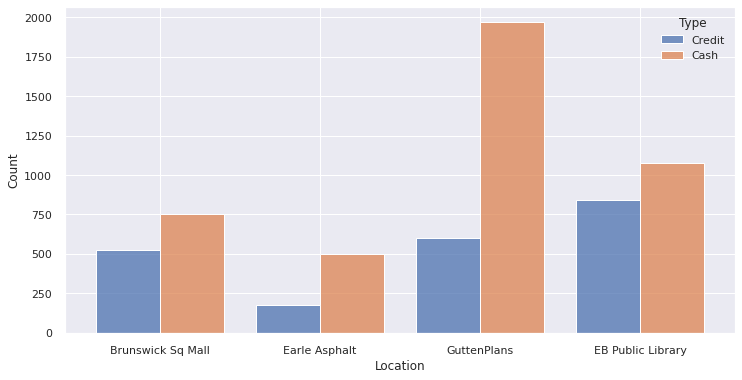

In [75]:
# เนื่องจากเป็นข้อมูลไม่ต่อเนื่อง ซึ่งไม่เหมาะสมกับกราฟเส้น จึงเปลี่ยนมาเป็น Histogram แทน
sns.histplot(data=df_vending, x="Location", hue="Type", multiple="dodge", shrink=.8)

In [76]:
#สร้าง dataframe เพื่อดูข้อมูลตั้งแต่อดีตจนถึงปัจจุบันของแต่ละสถานที่ว่ามีรายได้เป็นอย่างไร 
piv6 = df_vending.pivot_table(index="Location", columns="TransDate", values="LineTotal",aggfunc='sum')

piv6 = piv6.transpose().reset_index().rename(columns = {"index":"TransDate", 0:"Brunswick Sq Mall", 1:"EB Public Library", 2:"Earle Asphalt", 3:"GuttenPlans"})
display(piv6)



Location,TransDate,Brunswick Sq Mall,EB Public Library,Earle Asphalt,GuttenPlans
0,2022-01-01,13.50,NaN,NaN,NaN
1,2022-01-02,2.50,NaN,NaN,NaN
2,2022-01-03,4.50,NaN,9.75,18.0
3,2022-01-04,8.25,NaN,2.00,17.5
4,2022-01-05,3.00,NaN,4.00,8.5
...,...,...,...,...,...
237,2022-08-27,7.00,30.5,NaN,3.0
238,2022-08-28,45.00,NaN,NaN,NaN
239,2022-08-29,19.50,58.5,5.50,18.5
240,2022-08-30,11.50,33.5,11.75,20.5


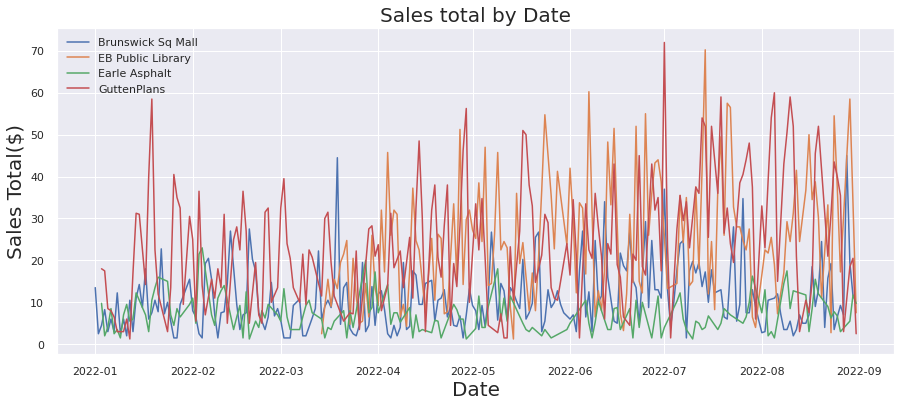

In [77]:
# สร้างกราฟเส้นเพื่อดูข้อมูลตั้งแต่อดีตจนถึงปัจจุบันของแต่ละสถานที่ว่ามีรายได้เป็นอย่างไร
# ข้อมูลดูยากเนื่องจากข้อมูลในแต่ละวันละเอียด และรายได้ในแต่ละวันค่อนข้างเหวี่ยง
# แต่เมื่อพิจารณาแล้วพบว่า ข้อมูลของ EB Public Library และ GuttenPlans มีความใกล้เคียงกัน แต่ EB Public Library เริ่มตั้งขายทีหลัง
# จึงทำให้ภาพรวมของ EB Public Library ต่ำกว่า 
# Earle Asphalt ภาพรวมรายได้ต่ำสุด
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data = piv6, x = "TransDate", y = "Brunswick Sq Mall", label = 'Brunswick Sq Mall')
sns.lineplot(data = piv6, x = "TransDate", y = "EB Public Library", label = 'EB Public Library')
sns.lineplot(data = piv6, x = "TransDate", y = "Earle Asphalt", label = 'Earle Asphalt')
sns.lineplot(data = piv6, x = "TransDate", y = "GuttenPlans", label = 'GuttenPlans')



plt.title('Sales total by Date', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Sales Total($)', fontsize=20)
plt.legend()